In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

%matplotlib inline

In [2]:
! git clone https://github.com/vicky-nike/try.git

Cloning into 'try'...
remote: Enumerating objects: 9913, done.
remote: Counting objects: 100% (9913/9913), done.
remote: Compressing objects: 100% (9912/9912), done.
remote: Total 9913 (delta 1), reused 9912 (delta 0), pack-reused 0
Receiving objects: 100% (9913/9913), 55.32 MiB | 33.09 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [0]:
DATADIR = "try/Dataset"
Categories = ["Negative", "Positive"]

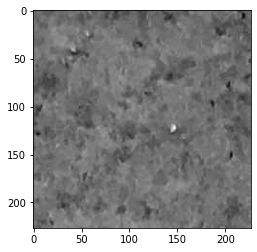

In [9]:
for category in Categories:
    path = os.path.join(DATADIR, category) #path to crack and non-crac dir
    #For showing image
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [10]:
print(img_array.shape)

(227, 227)


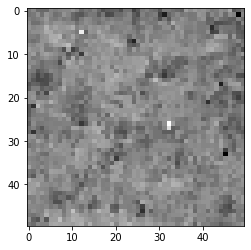

In [11]:
#To make every image of same size
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= 'gray')
plt.show()

training_data = []       #empty list

In [0]:
def create_training_data():
    for category in Categories:
        path = os.path.join(DATADIR, category) #We use this path of the code for iterating through the images
        class_num = Categories.index(category)      #since we have to set labels to images we will give them either 1 or 0
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])         #appending the value of image and labels to list
            except Exception as e:
                pass        #If there is any broken images it will be neglected

create_training_data()

In [13]:
print(len(training_data))        

10000


In [0]:
random.shuffle(training_data)       #shuffle the data

In [15]:
# Below we are checking if the datas are labeled or not
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
0
0
1
0
1


In [0]:
X = [] #feature list
y = [] #label list

In [0]:
#appending the features and labels value to the empty list
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)    
#Before feeding into the NN, we have to convert X from list to array, the 1 is for gray scale(3 for rgb image)

In [0]:
#After building dataset we have to save it
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [19]:
#to read
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

#to know the feature
print(X[1])

[[[157]
  [156]
  [167]
  ...
  [179]
  [174]
  [164]]

 [[163]
  [162]
  [165]
  ...
  [168]
  [173]
  [169]]

 [[164]
  [163]
  [159]
  ...
  [156]
  [172]
  [172]]

 ...

 [[151]
  [165]
  [154]
  ...
  [164]
  [162]
  [162]]

 [[152]
  [161]
  [160]
  ...
  [160]
  [160]
  [162]]

 [[159]
  [161]
  [158]
  ...
  [163]
  [166]
  [169]]]


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))  # at starting we can add any number like 64, (3,3) is the window size
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3)))  # at starting we can add any number like 64, (3,3) is the window size
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))    #before using dense we have to flatten the image from 2D to 1D as dense works on 1D
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(X, y, batch_size=32, epoch=20, validation_split= 0.1)   # spliting the validation into 10%

282/282 [==============================] - 46s 164ms/step - loss: 0.1507 - accuracy: 0.9377 - val_loss: 0.0678 - val_accuracy: 0.9770


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [22]:
ls

drive/  sample_data/  try/  X.pickle  y.pickle


In [23]:
cd drive

/content/drive


In [24]:
ls

'My Drive'/


In [25]:
cd My Drive

/content/drive/My Drive


In [26]:
ls

 19996.jpg                   'DL week 2.gdoc'
 19999.jpg                   'DL week 3.gdoc'
 anna.txt                    'DL week 4.gdoc'
'App for Fisheries.gslides'  'Getting started.pdf'
 BOI/                        'input image.ipynb'
'Colab Notebooks'/           'Janitor Satellite .gdoc'
'Concrete Crack Images'/     'Pros and cons.gsheet'
'DL C2 week 1.gdoc'          'R&D.gsheet'
'DL C2 week 2.gdoc'          'SC M1.gdoc'
'DL C2 week 3.gdoc'          'SC M2.gdoc'
'DL C3.gdoc'                 'Simple RNN.ipynb'
'DL C4 Week 1.gdoc'          'Suresh Kumar 29 September.pdf'
'DL week 1.gdoc'             'To-do list.gsheet'


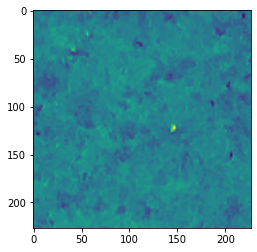

Crack Detected


In [32]:
import cv2

def prepare(filepath):
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict([prepare('19996.jpg')])

plt.imshow()
plt.show()

if prediction>0.5:
  print("Crack Detected")
else:
  print("No Crack detected")